# Competance Project

## Imports

In [1]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import metrics

from IPython.display import display

from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os



### About Dataset

[https://www.kaggle.com/datasets/g1llar/poland-olx-house-price-q122](https://www.kaggle.com/datasets/g1llar/poland-olx-house-price-q122)

Analyses of the pricing and brand based on [OLX Portal](https://www.olx.pl/nieruchomosci/mieszkania/)

Features description:
- offer_title: offer title
- price: price in PLN
- price_per_meter: price in PLN for square meter
- offer_type: as value name
- floor: floor number for -1 --> basement, 0 --> Ground Floor, 10 --> floor 10+, 11 --> attic
- area: area in square meters
- rooms: number of rooms for 4 --> rooms 4+
- offer_type_of_building: as value name
- market: as value name
- city_name: name of city where home is
- voivodeship: name of voivodeship where home is
- month: data download month
- year: data download year
- population: city population where home is
- longitude``latitude: city coordinates

The original file has bad encoding. Scraped data should be interpreted as UTF-8 and added features (voivodeship) as ANSI.

Possible fix:
1. Convert to ANSI
2. Replace all 'Świętokrzyskie' to 'Swietokrzyskie'
3. Interpret as UTF-8
4. Replace all  'Swietokrzyskie' to 'Świętokrzyskie'

In [2]:
PATH = "../data/olx_house_price_Q122.csv"

In [3]:
df_raw = pd.read_csv(PATH)

In [4]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [5]:
df_raw.shape

(62818, 16)

In [6]:
display_all(df_raw.tail().T)

,62813,62814,62815,62816,62817
offer_title,Mieszkanie 4-pokojowe 57m2 parter,Mieszkanie 4-pokojowe spółdz. własność. z umeb...,Mieszkanie z lokalem użytkowym,Mieszkanie 80m2 przy lesie,"Duże, komfortowe mieszkanie blisko Parku Zdroj..."
price,230000.0,390000.0,330000.0,830000.0,990000.0
price_per_meter,4035.09,5735.29,2704.92,10375.0,9437.56
offer_type,Private,Private,Private,Private,Private
floor,0.0,1.0,1.0,1.0,3.0
area,57.0,68.0,122.0,80.0,104.9
rooms,4,4,4,4,4
offer_type_of_building,Housing Block,Housing Block,Other,Housing Block,Housing Block
market,aftermarket,aftermarket,aftermarket,aftermarket,aftermarket
city_name,Złocieniec,Łobez,Świdwin,Świnoujście,Świnoujście


In [7]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
offer_title,62818,29138,Sprzedam mieszkanie,1855,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,62818.0,NaN,NaN,NaN,399405.854865,2023250.514224,1.0,260000.0,345000.0,460000.0,504151616.0
price_per_meter,62818.0,NaN,NaN,NaN,7596.442371,36561.779747,0.02,5250.0,6576.845,8766.93,9002707.43
offer_type,62818,2,Private,45449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor,61331.0,NaN,NaN,NaN,2.399749,2.15051,-1.0,1.0,2.0,3.0,11.0
area,61331.0,NaN,NaN,NaN,91.251837,3153.663628,1.0,42.0,51.2,63.0,399000.0
rooms,62818.0,NaN,NaN,NaN,2.515378,0.826473,1.0,2.0,2.0,3.0,4.0
offer_type_of_building,61331,5,Housing Block,43868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market,62818,2,aftermarket,55171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_name,62818,611,Warszawa,4297,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_raw.corr()

,price,price_per_meter,floor,area,rooms,year,population,longitude,latitude
price,1.000000,0.981488,0.001277,0.000295,0.040408,NaN,0.050284,0.001003,0.009655
price_per_meter,0.981488,1.000000,0.004335,-0.002520,-0.017683,NaN,0.053226,0.005617,0.007212
floor,0.001277,0.004335,1.000000,-0.005635,0.013448,NaN,0.118033,0.041130,-0.032957
area,0.000295,-0.002520,-0.005635,1.000000,-0.000252,NaN,0.003224,-0.001409,0.007318
rooms,0.040408,-0.017683,0.013448,-0.000252,1.000000,NaN,-0.070297,0.007835,0.036158
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,0.050284,0.053226,0.118033,0.003224,-0.070297,NaN,1.000000,0.182673,-0.022828
longitude,0.001003,0.005617,0.041130,-0.001409,0.007835,NaN,0.182673,1.000000,-0.172376
latitude,0.009655,0.007212,-0.032957,0.007318,0.036158,NaN,-0.022828,-0.172376,1.000000


### Look at the data

#### Missing values

In [9]:
display_all(pd.DataFrame({"number": df_raw.isnull().sum(), "percentage":df_raw.isnull().sum().sort_values(ascending=False)/len(df_raw)}))

,number,percentage
area,1487,0.023672
city_name,0,0.000000
floor,1487,0.023672
latitude,0,0.000000
longitude,0,0.000000
market,0,0.000000
month,0,0.000000
offer_title,0,0.000000
offer_type,0,0.000000
offer_type_of_building,1487,0.023672


In [10]:
df_raw.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
offer_title,62818,29138,Sprzedam mieszkanie,1855,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,62818.0,NaN,NaN,NaN,399405.854865,2023250.514224,1.0,260000.0,345000.0,460000.0,504151616.0
price_per_meter,62818.0,NaN,NaN,NaN,7596.442371,36561.779747,0.02,5250.0,6576.845,8766.93,9002707.43
offer_type,62818,2,Private,45449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor,61331.0,NaN,NaN,NaN,2.399749,2.15051,-1.0,1.0,2.0,3.0,11.0
area,61331.0,NaN,NaN,NaN,91.251837,3153.663628,1.0,42.0,51.2,63.0,399000.0
rooms,62818.0,NaN,NaN,NaN,2.515378,0.826473,1.0,2.0,2.0,3.0,4.0
offer_type_of_building,61331,5,Housing Block,43868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market,62818,2,aftermarket,55171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_name,62818,611,Warszawa,4297,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_raw[df_raw["floor"].isnull()].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
offer_title,1487,672,Sprzedam mieszkanie,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,1487.0,NaN,NaN,NaN,417619.282112,351042.733482,1190.0,260000.0,340000.0,473806.0,4200000.0
price_per_meter,1487.0,NaN,NaN,NaN,8231.820545,21830.908497,16.36,4814.81,6200.0,8500.0,425000.0
offer_type,1487,2,Private,910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,1487.0,NaN,NaN,NaN,2.621385,0.917836,1.0,2.0,3.0,3.0,4.0
offer_type_of_building,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market,1487,2,aftermarket,1149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_name,1487,228,Warszawa,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Area can be calculated from `price` and `price_per_meter`.
Houses with missing values are approx. 8% more expensive

#### Types

In [12]:
df_raw.dtypes

offer_title                object
price                     float64
price_per_meter           float64
offer_type                 object
floor                     float64
area                      float64
rooms                       int64
offer_type_of_building     object
market                     object
city_name                  object
voivodeship                object
month                      object
year                        int64
population                  int64
longitude                 float64
latitude                  float64
dtype: object

#### Features

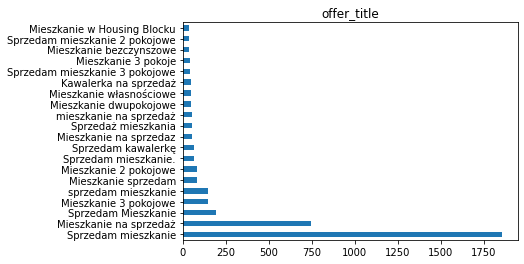

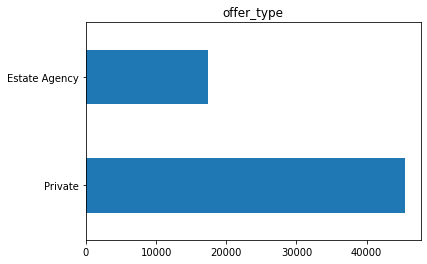

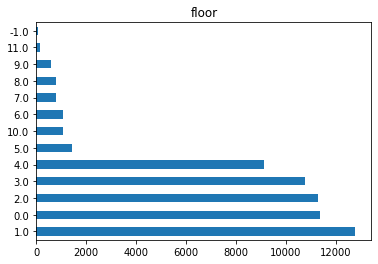

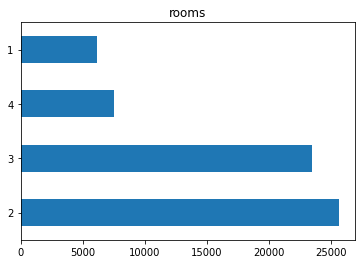

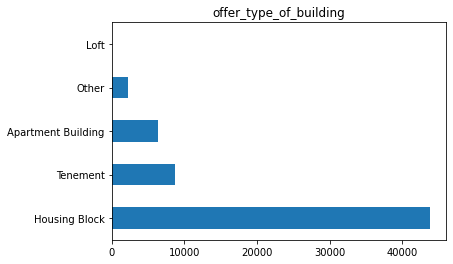

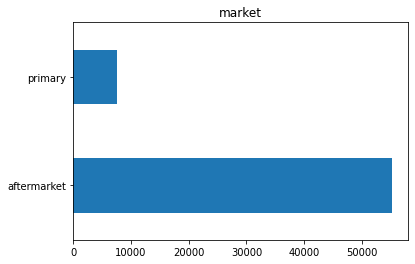

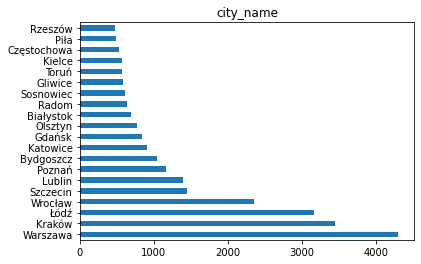

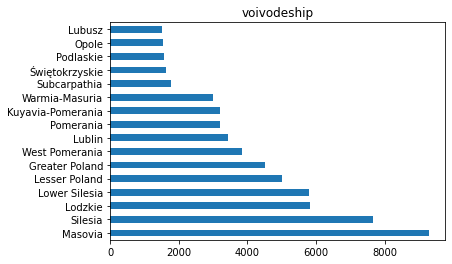

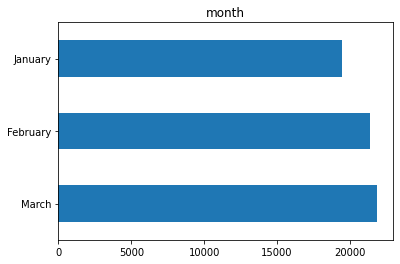

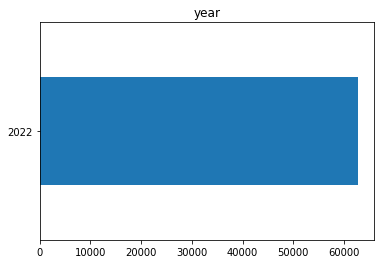

In [13]:
to_be_ploted = ["offer_title", "offer_type", "floor", "rooms", "offer_type_of_building", "market","city_name","voivodeship", "month", "year"]

for feature in to_be_ploted:
    plt.figure()
    df_raw[feature].value_counts().sort_values(ascending=False).head(20).plot(kind='barh', title=feature)

plt.show()


### Pre-processing

Target variable is `price`. `price_per_meter` contain exit information so should not be used for prediction.

In [14]:
target = "price"
to_drop = ["price_per_meter", "offer_title"]
df = df_raw.drop(to_drop, axis=1)

encode categorical_features

In [15]:
# categorical_features = ["offer_title", "offer_type", "floor", "rooms", "offer_type_of_building", "market","city_name","voivodeship", "month"]
categorical_features = ["offer_type", "offer_type_of_building", "market","city_name","voivodeship", "month"]
encoder = OrdinalEncoder(dtype=np.int32, encoded_missing_value=-2)
df[categorical_features]= encoder.fit_transform(df[categorical_features])

fill missing values

In [16]:
df.fillna({"area": df["area"].mean(), "floor": -2}, inplace=True)

verify

In [17]:
pd.DataFrame({"number of missing values": df.isnull().sum(), "dtype":df.dtypes})

,number of missing values,dtype
price,0,float64
offer_type,0,int32
floor,0,float64
area,0,float64
rooms,0,int64
offer_type_of_building,0,int32
market,0,int32
city_name,0,int32
voivodeship,0,int32
month,0,int32


In [18]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

def rmse(x,y):
    return sqrt(((x-y)**2).mean())

def print_score(m):
    res = {
        'rmse_train': rmse(m.predict(X_train), y_train), 
        'rmse_valid': rmse(m.predict(X_valid), y_valid),
        'r2_train': m.score(X_train, y_train),
        'r2_valid': m.score(X_valid, y_valid)
    }
    if hasattr(m, 'oob_score_'):
        res['r2_oob'] = m.oob_score_
    print(res)

# source: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
def plot_importances(m, columns):
    importances = m.feature_importances_
    std = np.std([tree.feature_importances_ for tree in m], axis=0)

    forest_importances = pd.Series(importances, index=columns)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()

In [19]:
subset, _ = split_vals(df, 30000)
X = subset.drop(target, axis=1)
y = subset[target]

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
hparam_grid_1 = {"n_estimators": np.arange(20, 200, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "log2"],
           "max_samples": [10000],
           'oob_score': [True, False],
           }

hparam_grid_2 = {"n_estimators": np.arange(20, 200, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "log2"],
           'bootstrap': [True],
           'oob_score': [True, False],
           }

In [22]:
opt = RandomizedSearchCV(
    RandomForestRegressor(n_jobs=-1, random_state=42),
    # scoring="neg_root_mean_squared_error",
    param_distributions=hparam_grid_2,
    n_iter=20,
    cv=5,
    verbose=True,
    n_jobs = -1
    )

m = opt.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [23]:
print_score(m)
opt.best_estimator_

{'rmse_train': 103332.77222433944, 'rmse_valid': 109980.25552991741, 'r2_train': 0.7991471729663083, 'r2_valid': 0.7630943610495899}


RandomForestRegressor(max_features='log2', min_samples_leaf=5,
                      min_samples_split=10, n_estimators=140, n_jobs=-1,
                      oob_score=True, random_state=42)

{'rmse_train': 103332.77222433944, 'rmse_valid': 109980.25552991741, 'r2_train': 0.7991471729663083, 'r2_valid': 0.7630943610495899}


RandomForestRegressor(max_features='log2', min_samples_leaf=5,
                      min_samples_split=10, n_estimators=140, n_jobs=-1,
                      oob_score=True, random_state=42)

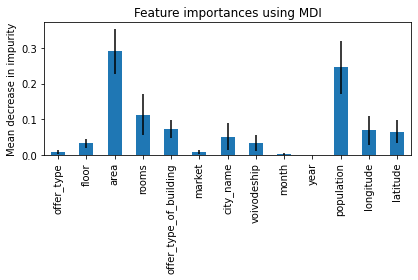

In [24]:
print_score(m)
plot_importances(opt.best_estimator_, X_train.columns)

opt.best_estimator_

Drop not important features

In [25]:
to_drop = ["offer_type", "market", "month", "year"]
df = df.drop(to_drop, axis=1)

In [26]:
subset, _ = split_vals(df, 30000)
X = subset.drop(target, axis=1)
y = subset[target]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

opt = RandomizedSearchCV(
    RandomForestRegressor(n_jobs=-1, random_state=42),
    # scoring="neg_root_mean_squared_error",
    param_distributions=hparam_grid_2,
    n_iter=20,
    cv=5,
    verbose=True,
    n_jobs = -1
    )

m = opt.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'rmse_train': 72488.17661945419, 'rmse_valid': 88650.41962077969, 'r2_train': 0.9011592258409298, 'r2_valid': 0.8460755747397999}


RandomForestRegressor(max_features='log2', min_samples_split=8,
                      n_estimators=170, n_jobs=-1, random_state=42)

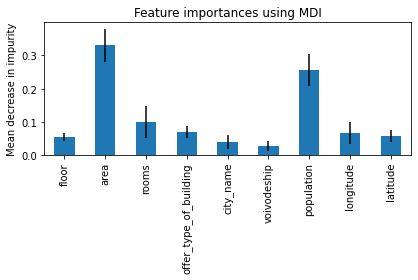

In [27]:
print_score(m)
plot_importances(opt.best_estimator_, X_train.columns)

opt.best_estimator_